Polygons and External Objects
=============================
Thanks to a soft dependency on Shapely and Trimesh polygons and polyhedrons can be
created. For this, two additional domains exist: *ShapelyPolygon* and *TrimeshPolyhedron*. 
They combine the properties of the previously explained domains with the feature of the packages. 
This means you can:

- Call the boundary with **.boundary**
- Compute volume, bounding boxes and normal vectors
- Create points inside and on the boundary
- Use the operations *+*, *-* and *&* to create complex domains

But what is **not** possible, is the creation of variable/changing polygons. 
The vertices have to stay always the same.

Polygons
--------
If you have the package Shapely installed, you can find the class *ShapelyPolygon* under:


In [1]:
# This is only valid when the package is not installed
import sys
sys.path.append('../../') # two folders up

import DeepINN as dp
from DeepINN.geometry.domains.domain2D.shapely_polygon import ShapelyPolygon # polygon creator

Using default backend: PyTorch
Using Pytorch:  2.0.1+cu117


This class can be constructed through two different ways, either you create your own 
shapely-polygon yourself, or you pass all vertices of the polygon to the constructor:

In [2]:
X = dp.spaces.R2('x')
P = ShapelyPolygon(X, vertices=[[0, 0], [1, 0], [1, 2], [0, 1]])

Like mentioned before, all properties of the pre implemented domains work also for these domains. Therefore, we can have a look at the polygon we created. Again we need 
the *PointSamplers* which are part of the next tutorial. 

/home/hell/Desktop/repos/DeepINN/.venv/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/hell/Desktop/repos/DeepINN/Tutorials/1. Geometry/../../DeepINN/geometry/domains/domain2D/parallelogram.py:134: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  bary_coords = torch.stack(torch.meshgrid((x, y))).T.reshape(-1, 2)


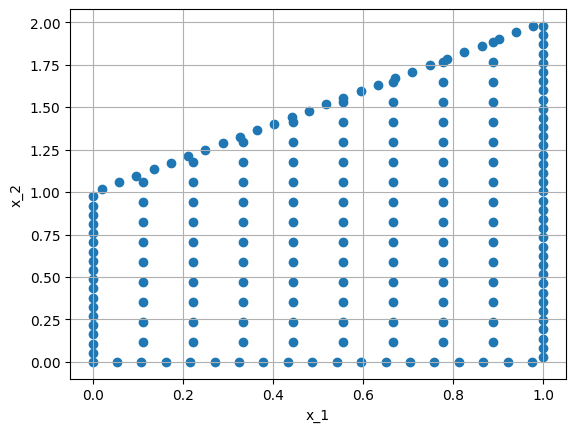

In [3]:
P_sampler = dp.samplers.GridSampler(P, n_points=100) + dp.samplers.GridSampler(P.boundary, n_points=100)

dp.utils.scatter(X, P_sampler)

If you have the package Trimesh installed, you can find the class *TrimeshPolyhedron* under:

In [4]:
from DeepINN.geometry.domains.domain3D.trimesh_polyhedron import TrimeshPolyhedron

For this class, there are also two different ways to create a polyhedron. The first one is to define the vertices and say which vertices create a side of the object. For example, a simplex is created with:

In [5]:
X = dp.spaces.R3('x')
vertices = [[0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [0.5, 0.5, -1]]
faces = [[0, 1, 3], [0, 2, 3], [1, 2, 3], [0, 2, 4], [0, 1, 4], [1, 2, 4]]
P = TrimeshPolyhedron(X, vertices=vertices, faces=faces)

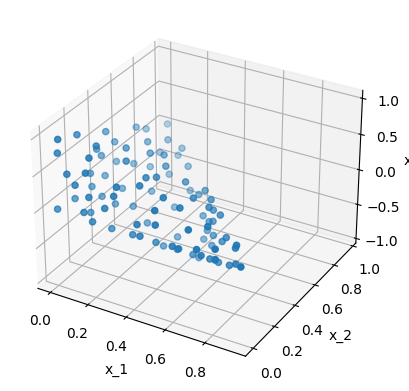

In [6]:
P_sampler = dp.samplers.GridSampler(P.boundary, n_points=100) # only show the boundary

dp.utils.scatter(X, P_sampler)

External Objects
----------------
The other way is to import an externally created 3D-Object, on which a PDE should be 
trained. This is already implemented in Trimesh and supports STL, ASCII, OBJ and many 
more. 

To do this one has to only specify the path to the object and the type of the file,
in the constructor of the *TrimeshPolyhedron*:

In [7]:
X = dp.spaces.R3('x')
P = TrimeshPolyhedron(X, file_name='L_plate.stl', file_type='stl')

Where we now have used an L-shaped domain, again all previously mentioned methods are useable:

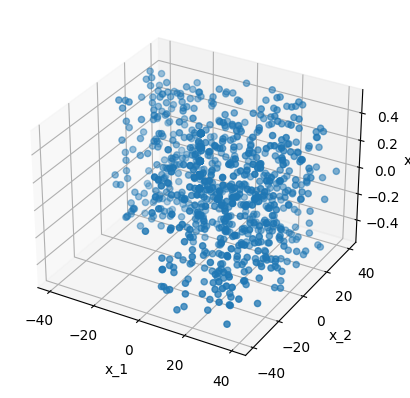

In [8]:
P_sampler = dp.samplers.GridSampler(P, density=0.2)

dp.utils.scatter(X, P_sampler)

The last point of this tutorial is the possibility to transform a *TrimeshPolyhedron* to a *ShapelyPolygon*, by either projecting or slicing with a plane. This is also a functionality implemented in Trimesh. 

This may be useful, if the problem should first be researched in 2D, which most of the time is less expensive. For this, only have to choose how we want to create the 2D-representation. Here we use slicing, the projection works the same:

In [9]:
new_space = dp.spaces.R2('x') # the new object is 2D
p = P.slice_with_plane(new_space=new_space, plane_origin=[0, 0, 0], plane_normal=[0, 0, 1])

The created object *p* is a *ShapelyPolygon*, that can be used like before:

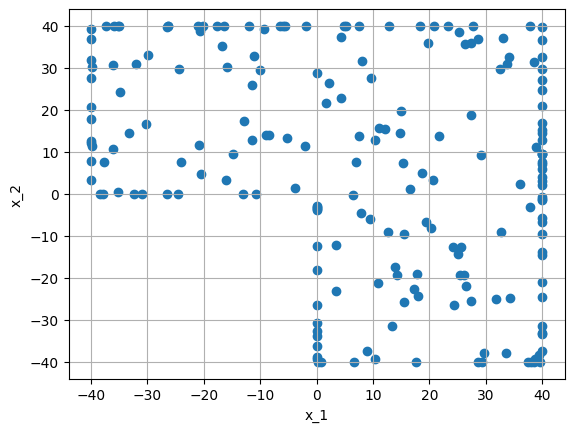

In [10]:
p_sampler = dp.samplers.RandomUniformSampler(p, n_points=100) \
           + dp.samplers.RandomUniformSampler(p.boundary, n_points=100)

dp.utils.scatter(new_space, p_sampler)